<a href="https://colab.research.google.com/github/rishijain544/CodeAlpha_machinelearning-/blob/main/CreditScoringModelipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STEP 1: Load the dataset**

In [4]:
import pandas as pd

df=pd.read_csv('/content/loan_data_1248_with_missing.csv')
df.head(10)

,income,loan_amount,term,credit_history,defaulted
0,60940.854754,17402.715471,60,1.0,1
1,49511.242579,6664.626123,36,0.0,0
2,63658.393686,17985.281393,60,0.0,1
3,79414.537415,21001.173770,36,1.0,0
4,47785.239255,4037.586145,36,1.0,0
5,NaN,18244.339419,36,1.0,0
6,NaN,23366.013955,60,1.0,1
7,65813.825125,8742.153888,60,1.0,0
8,43549.461053,26035.434321,36,1.0,1
9,61766.080785,18514.114056,60,1.0,0


# **Step 2: Understand the data type and shape of the dataset**

In [5]:
df.shape

(1248, 5)

In [6]:
df.columns.tolist()

['income', 'loan_amount', 'term', 'credit_history', 'defaulted']

In [7]:
df.dtypes

,0
income,float64
loan_amount,float64
term,int64
credit_history,float64
defaulted,int64


# **Step 3: Preprocessing data**

In [8]:
df.isnull().sum()

,0
income,120
loan_amount,122
term,0
credit_history,112
defaulted,0


In [9]:
df.fillna({'income':df['income'].median()},inplace=True)
df.fillna({'loan_amount':df['loan_amount'].median()},inplace=True)

df.fillna({'credit_history':df['credit_history'].mode()[0]},inplace=True)

In [10]:
df.isnull().sum()

,0
income,0
loan_amount,0
term,0
credit_history,0
defaulted,0


In [11]:
df.describe()

,income,loan_amount,term,credit_history,defaulted
count,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000
mean,52500.945298,16167.787505,48.000000,0.771635,0.414263
std,16967.161028,5541.521139,12.004811,0.419948,0.492792
min,8000.000000,1000.000000,36.000000,0.000000,0.000000
25%,41673.912889,12772.722413,36.000000,1.000000,0.000000
50%,52462.564119,16052.247335,48.000000,1.000000,0.000000
75%,62987.634437,19610.211517,60.000000,1.000000,1.000000
max,121349.166832,35158.645407,60.000000,1.000000,1.000000


# **step 4: Data Visualization**

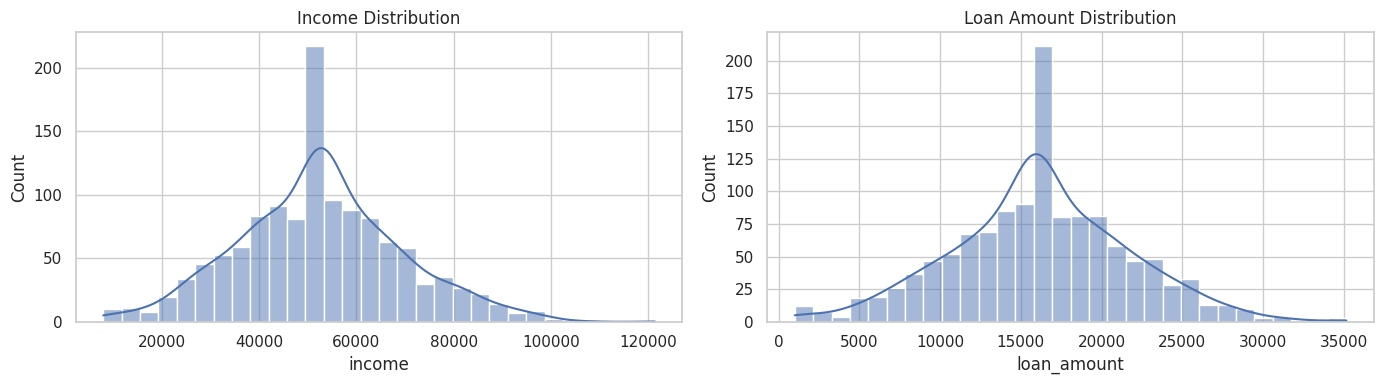

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
fig, axes=plt.subplots(1,2, figsize=(14,4))
sns.histplot(df['income'],kde=True,bins=30, ax=axes[0])
axes[0].set_title('Income Distribution')
sns.histplot(df['loan_amount'],kde=True,bins=30,ax=axes[1])
axes[1].set_title("Loan Amount Distribution")
plt.tight_layout()
plt.show()

# **Loan term count plot **

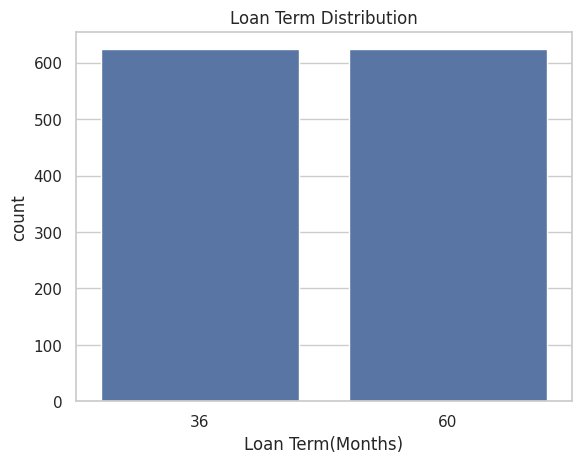

In [13]:
sns.countplot(x='term',data=df)
plt.title('Loan Term Distribution')
plt.xlabel('Loan Term(Months)')
plt.ylabel('count')
plt.show()

# **Credit History Vs Defaulted**

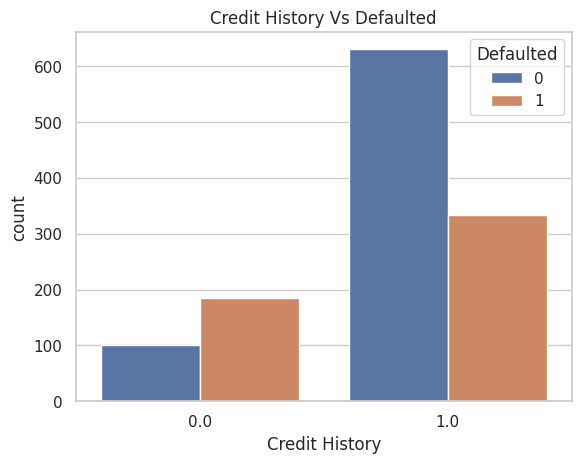

In [14]:
sns.countplot(x='credit_history',hue='defaulted',data=df)
plt.title('Credit History Vs Defaulted')
plt.xlabel('Credit History')
plt.ylabel('count')
plt.legend(title='Defaulted')
plt.show()

# **Correlation Heatmap**

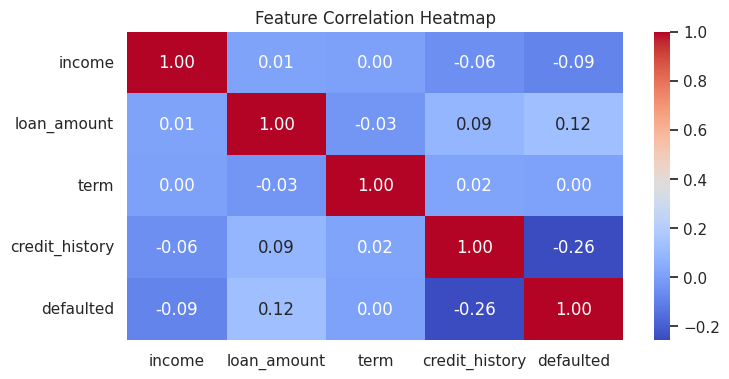

In [15]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# **step 5: Feature Engineering**

# **1) convert categorical Features**

In [16]:
df['term_binary']=df['term'].apply(lambda x:1 if x==60 else 0)

# 2)** Create Derived Features**

In [23]:
import numpy as np
df['log_income']=np.log1p(df['income'])

df['log_loan_amount']=np.log1p(df['loan_amount'])

# **3) Feature Selection**

In [21]:
features=['log_income','log_loan_amount','credit_history']
target='defaulted'

# **Step :6 Model Training**

1) Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scale_features=['log_income','log_loan_amount']
df[scale_features]=scaler.fit_transform(df[scale_features])
df.head()

,income,loan_amount,term,credit_history,defaulted,term_binary,log_income,log loan_amount,log_loan_amount
0,60940.854754,17402.715471,60,1.0,1,1,0.555865,9.764439,0.335135
1,49511.242579,6664.626123,36,0.0,0,0,0.010029,8.804719,-1.753786
2,63658.393686,17985.281393,60,0.0,1,1,0.670515,9.797365,0.406800
3,79414.537415,21001.173770,36,1.0,0,0,1.251689,9.952381,0.744209
4,47785.239255,4037.586145,36,1.0,0,0,-0.083218,8.303650,-2.844410


# **2) Train Test Split**

In [25]:
from sklearn.model_selection import train_test_split
X=df[features]
y=df[target]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)



# 3) Build model pipeline

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [27]:
models ={
    'LogisticRegression':LogisticRegression(max_iter=1000,random_state=42),
    'DecisionTreeClassifier':DecisionTreeClassifier(random_state=42),
    'RandomForestClassifier':RandomForestClassifier(n_estimators=100,random_state=42)
}

In [29]:
for name,model in models.items():
  print(f"\nModel:{name}")
  pipeline= Pipeline([('classifier',model)])
  pipeline.fit(X_train,y_train)

  y_pred=pipeline.predict(X_test)
  print(f"Accuracy:{accuracy_score(y_test,y_pred):.4f}")
  print(classification_report(y_test,y_pred))


Model:LogisticRegression
Accuracy:0.6520
              precision    recall  f1-score   support

           0       0.65      0.86      0.74       143
           1       0.67      0.37      0.48       107

    accuracy                           0.65       250
   macro avg       0.66      0.62      0.61       250
weighted avg       0.66      0.65      0.63       250


Model:DecisionTreeClassifier
Accuracy:0.5400
              precision    recall  f1-score   support

           0       0.59      0.62      0.60       143
           1       0.46      0.44      0.45       107

    accuracy                           0.54       250
   macro avg       0.53      0.53      0.53       250
weighted avg       0.54      0.54      0.54       250


Model:RandomForestClassifier
Accuracy:0.6080
              precision    recall  f1-score   support

           0       0.64      0.72      0.68       143
           1       0.55      0.46      0.50       107

    accuracy                           0.61     